In [6]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

import pyarrow.parquet as pq

# Define the folder path
folder_path = Path('/mnt', 'nvme', 'datasets', 'sieglew', 'TripSequences', "trips_processed_pinn_4")




In [20]:
# Initialize an empty list to store file information
file_info = []
mean_temperatures = []
data = []


# Iterate through each file in the folder
for file in folder_path.glob('*.parquet'):

    df  = pd.read_parquet(file)
    # Get the number of rows in the parquet file
    num_rows = pq.read_metadata(file).num_rows

    # get mean temp
    mean_temp = df['airtempoutsd_cval_cpc'].mean()
    mean_lat  = df["latitude_cval_ippc"].mean()
    data.append((file, mean_temp, mean_lat))

    # Append the file name and number of rows to the list
    file_info.append({'FileName': file.name, 'Length': num_rows, "Temp": mean_temp, "Lat": mean_lat})

# Create a DataFrame from the list
df_files_lengths = pd.DataFrame(file_info)

df_data = pd.DataFrame(data, columns=['Filename', 'Mean Temperature (°C)', 'Mean Latitude'])

# Display the DataFrame
print(df_files_lengths)

               FileName  Length       Temp        Lat
0     V14_T1084.parquet    7553  13.211119  48.971914
1     V17_T1107.parquet    1330   1.699878  48.836308
2      V13_T797.parquet   13482  20.621083  48.903699
3      V16_T174.parquet    2398  16.780877  51.984539
4      V13_T969.parquet   11646  13.959538  48.913101
...                 ...     ...        ...        ...
6621   V12_T797.parquet   10344  12.161487  49.174904
6622  V16_T2252.parquet    3653  13.369943  52.116378
6623   V13_T532.parquet    4848  31.207546  48.942140
6624  V101_T326.parquet    4708  20.914339  48.343488
6625   V12_T597.parquet   14139   9.442321  49.205604

[6626 rows x 4 columns]


In [21]:
df_files_lengths.to_pickle('df_files_lengths_3.pickle')

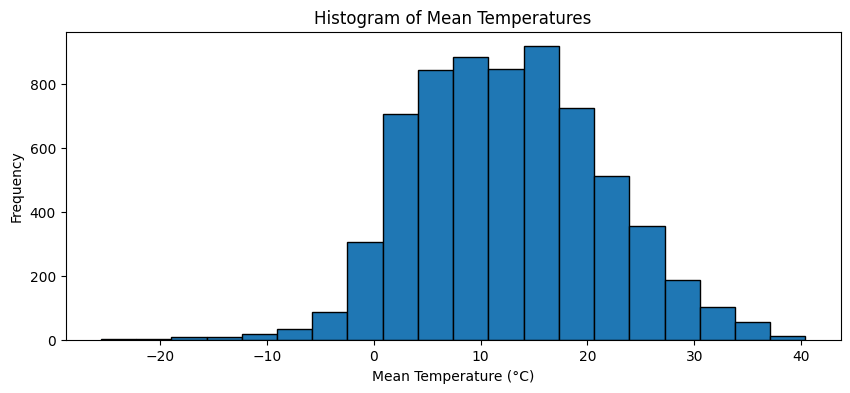

In [8]:
# Plot a histogram of the extracted mean temperatures
plt.figure(figsize=(10, 4))
plt.hist(df_data['Mean Temperature (°C)'], bins=20, edgecolor='black')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Temperatures')
plt.show()

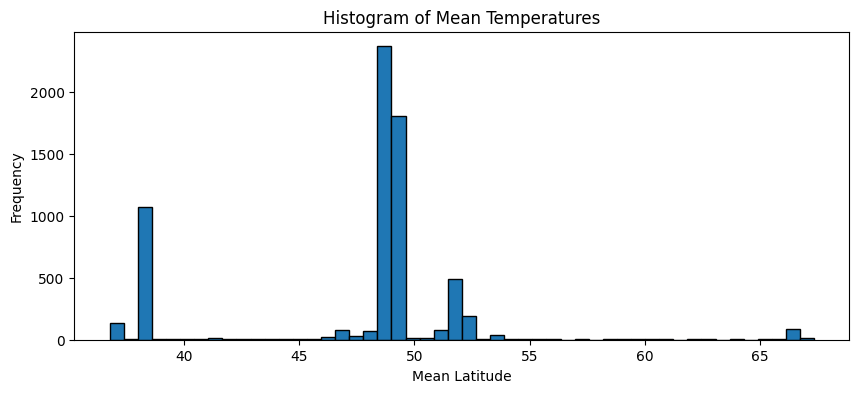

In [14]:
# Plot a histogram of the extracted mean temperatures
plt.figure(figsize=(10, 4))
plt.hist(df_data['Mean Latitude'], bins=50, edgecolor='black')
plt.xlabel('Mean Latitude')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Temperatures')
plt.show()

In [12]:
df_data

,Filename,Mean Temperature (°C),Mean Latitude
0,/mnt/nvme/datasets/sieglew/TripSequences/trips...,13.211119,48.971914
1,/mnt/nvme/datasets/sieglew/TripSequences/trips...,1.699878,48.836308
2,/mnt/nvme/datasets/sieglew/TripSequences/trips...,20.621083,48.903699
3,/mnt/nvme/datasets/sieglew/TripSequences/trips...,16.780877,51.984539
4,/mnt/nvme/datasets/sieglew/TripSequences/trips...,13.959538,48.913101
...,...,...,...
6621,/mnt/nvme/datasets/sieglew/TripSequences/trips...,12.161487,49.174904
6622,/mnt/nvme/datasets/sieglew/TripSequences/trips...,13.369943,52.116378
6623,/mnt/nvme/datasets/sieglew/TripSequences/trips...,31.207546,48.942140
6624,/mnt/nvme/datasets/sieglew/TripSequences/trips...,20.914339,48.343488


In [19]:
len([x for x in df_data['Mean Latitude'] if x >45 and x < 60]) / len(df_data)

0.7899185028674917